In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
from helper.pickle_utils import load_pickle, save_pickle
from helper.eda import dataframe_info

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from glob import glob


/Users/jerome/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [3]:
df_result=pd.read_json('./model/df_result.json')
df_result

,Model_Name,Best_Params,Confusion_Matrix,Score
0,Decision Tree,"{'clf__class_weight': 'balanced', 'clf__max_de...","[[[163, 14, 29, 8, 18, 22, 2, 13], [7, 121, 0,...",0.614022
1,Random Forest,"{'clf__class_weight': 'balanced', 'clf__max_de...","[[[174, 16, 29, 6, 8, 20, 3, 13], [8, 137, 2, ...",0.663744
2,Logistic_Regression,"{'clf__C': 3.1622776602, 'clf__class_weight': ...","[[[186, 15, 14, 7, 6, 25, 3, 13], [9, 130, 2, ...",0.683733
3,SVC,"{'clf__C': 0.1, 'clf__class_weight': 'balanced'}","[[[179, 16, 23, 4, 8, 23, 3, 13], [7, 136, 2, ...",0.688579
4,BERT,{},[],0.665990


No handles with labels found to put in legend.


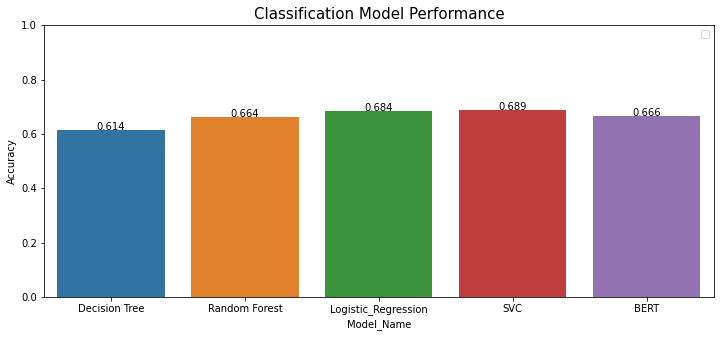

In [4]:
plt.figure(figsize=(12,5))
plt.ylim(0, 1.0)
plt.title('Classification Model Performance', fontsize=15)
g = sns.barplot(data=df_result, x='Model_Name', y='Score')
for index, row in df_result.iterrows():
    g.text(index, row.Score, round(row.Score,3), color='black', ha="center")

plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./plot/barplot_model_performance.png')
plt.show()

## Confusion Matrix

confmat_Logistic_Regression.png


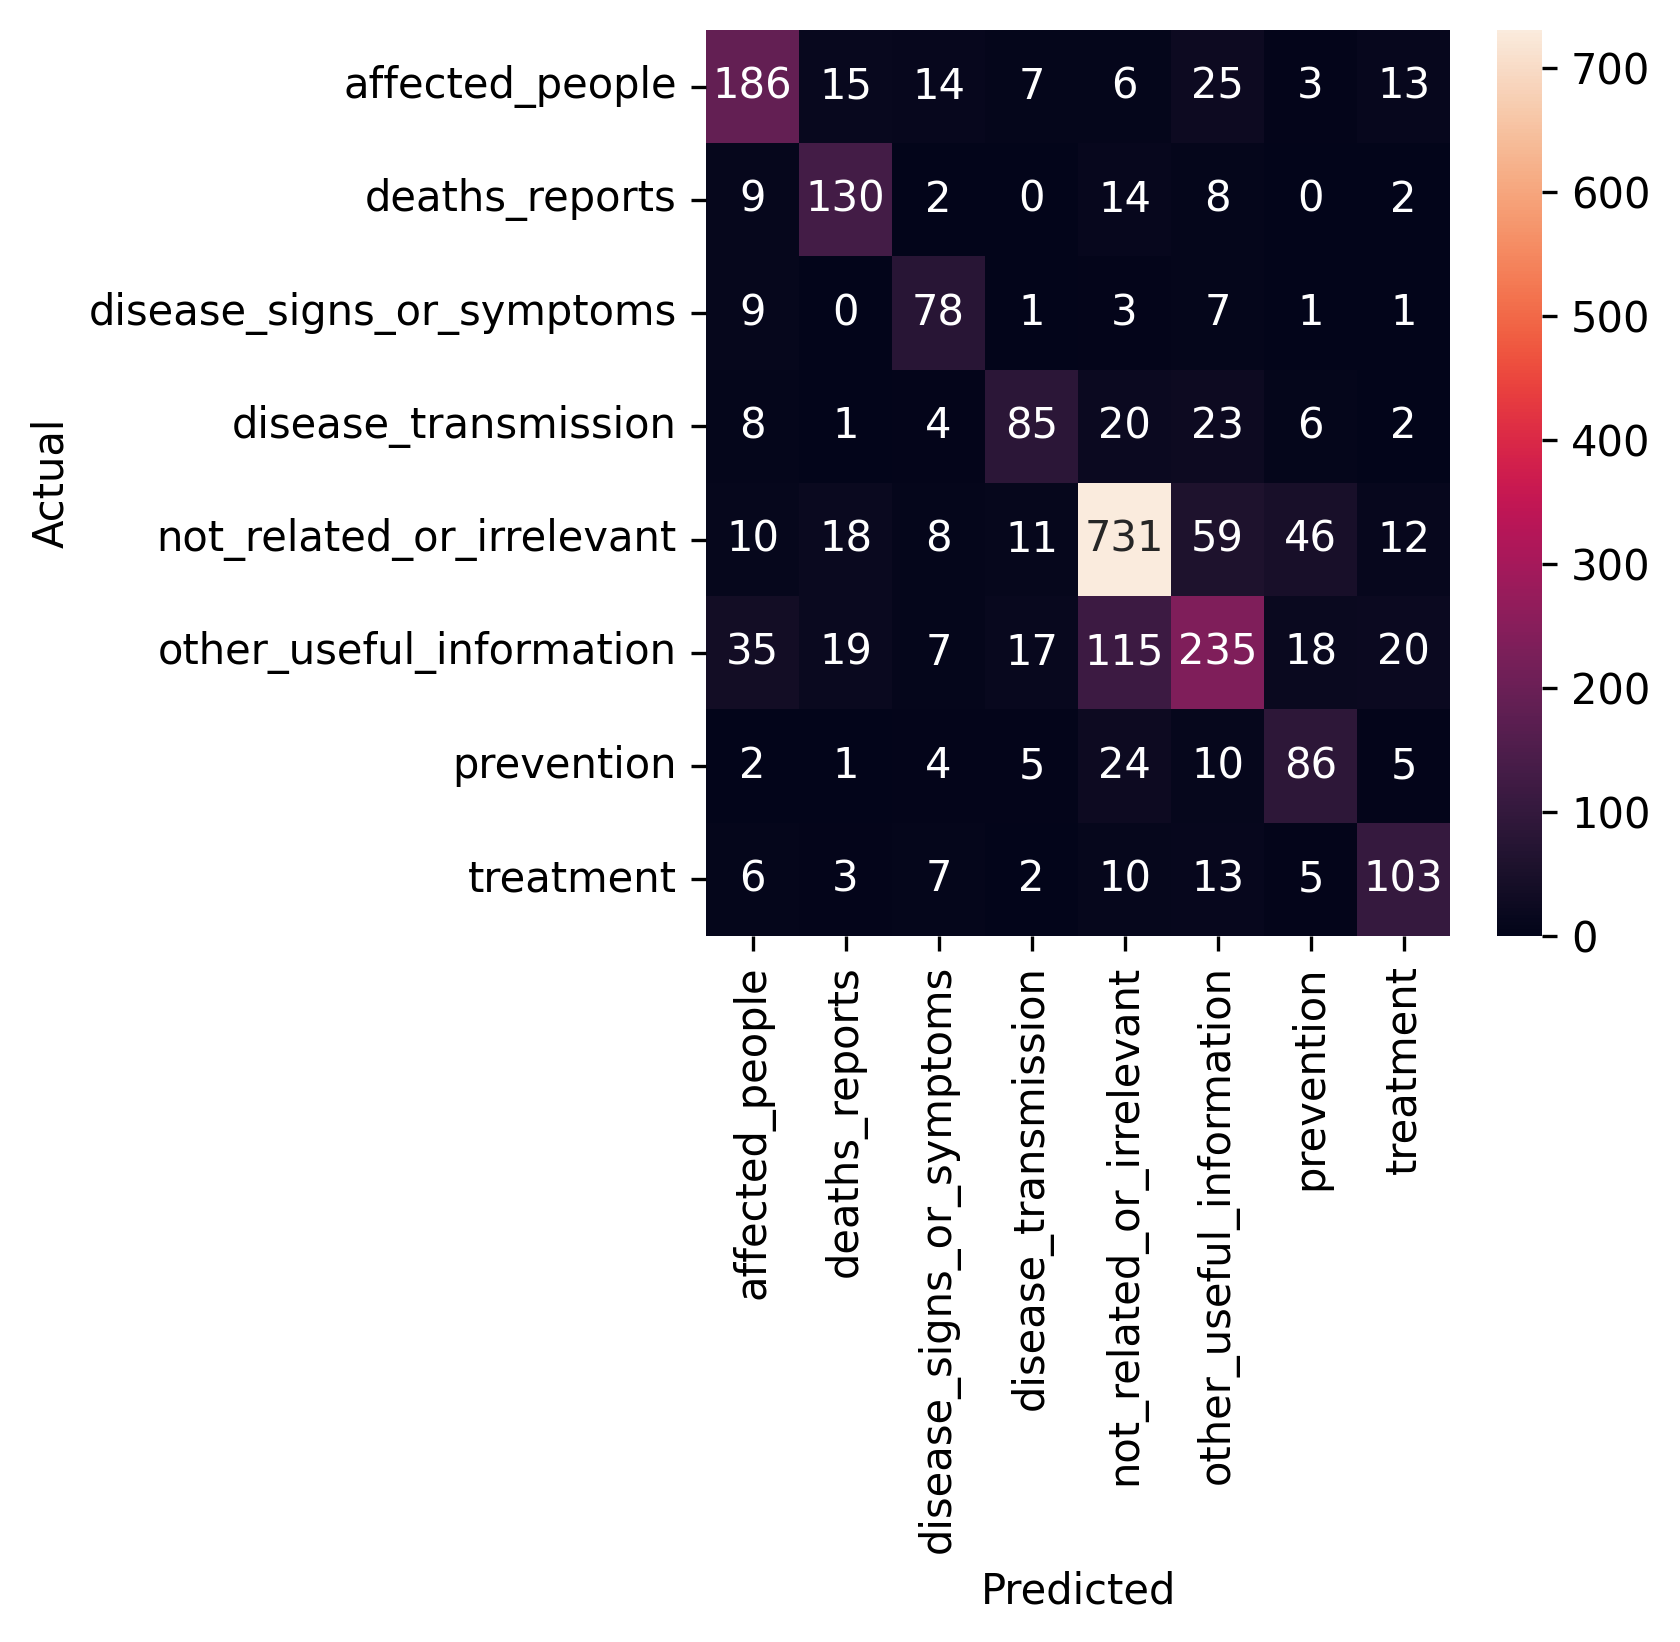

confmat_Decision_Tree.png


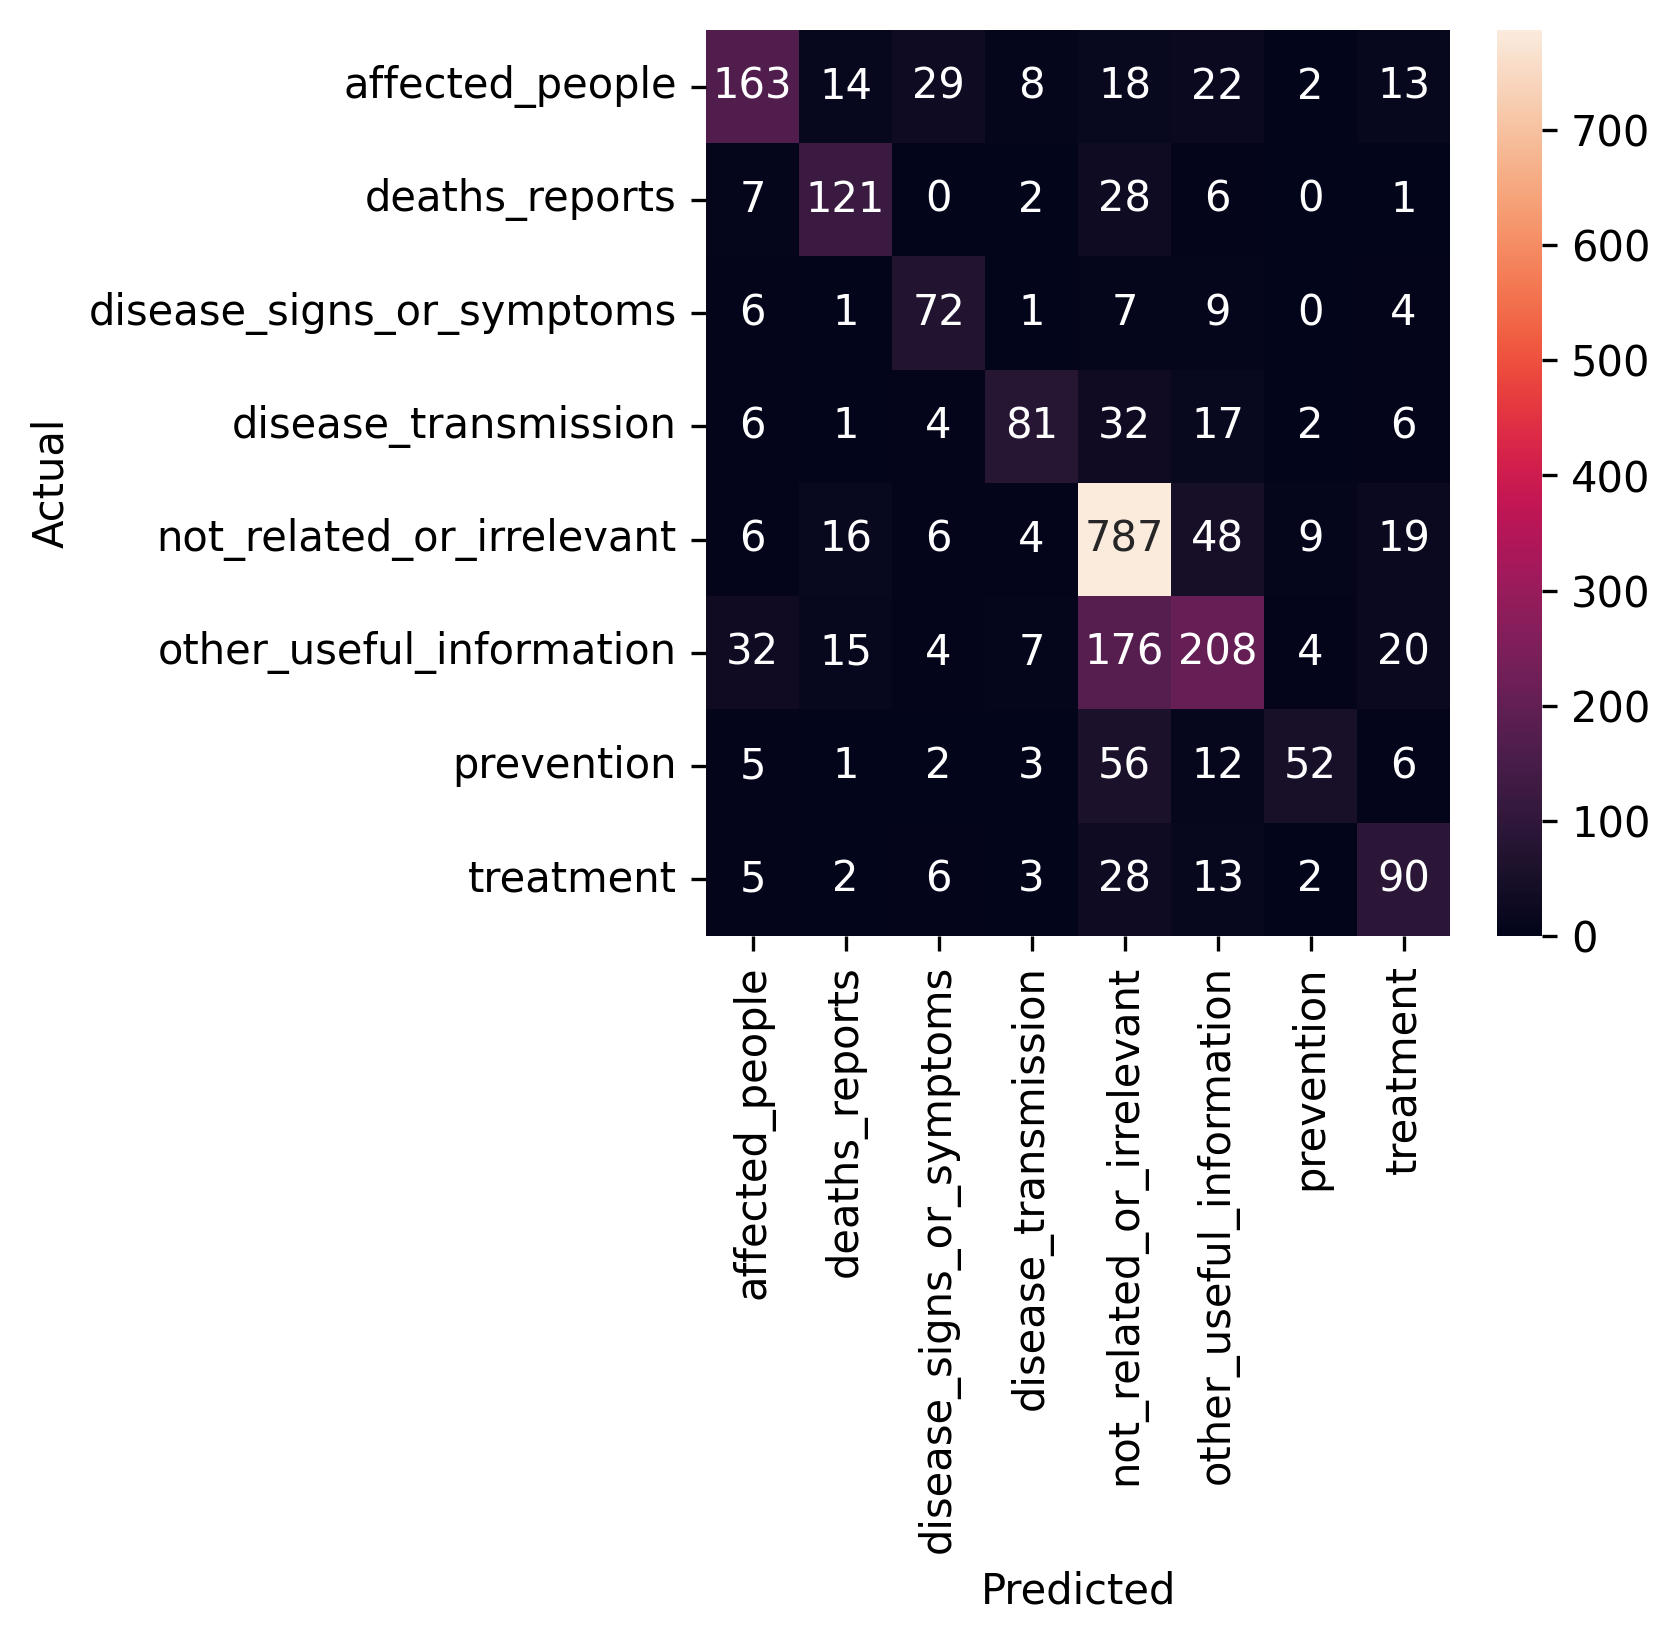

confmat_Random_Forest.png


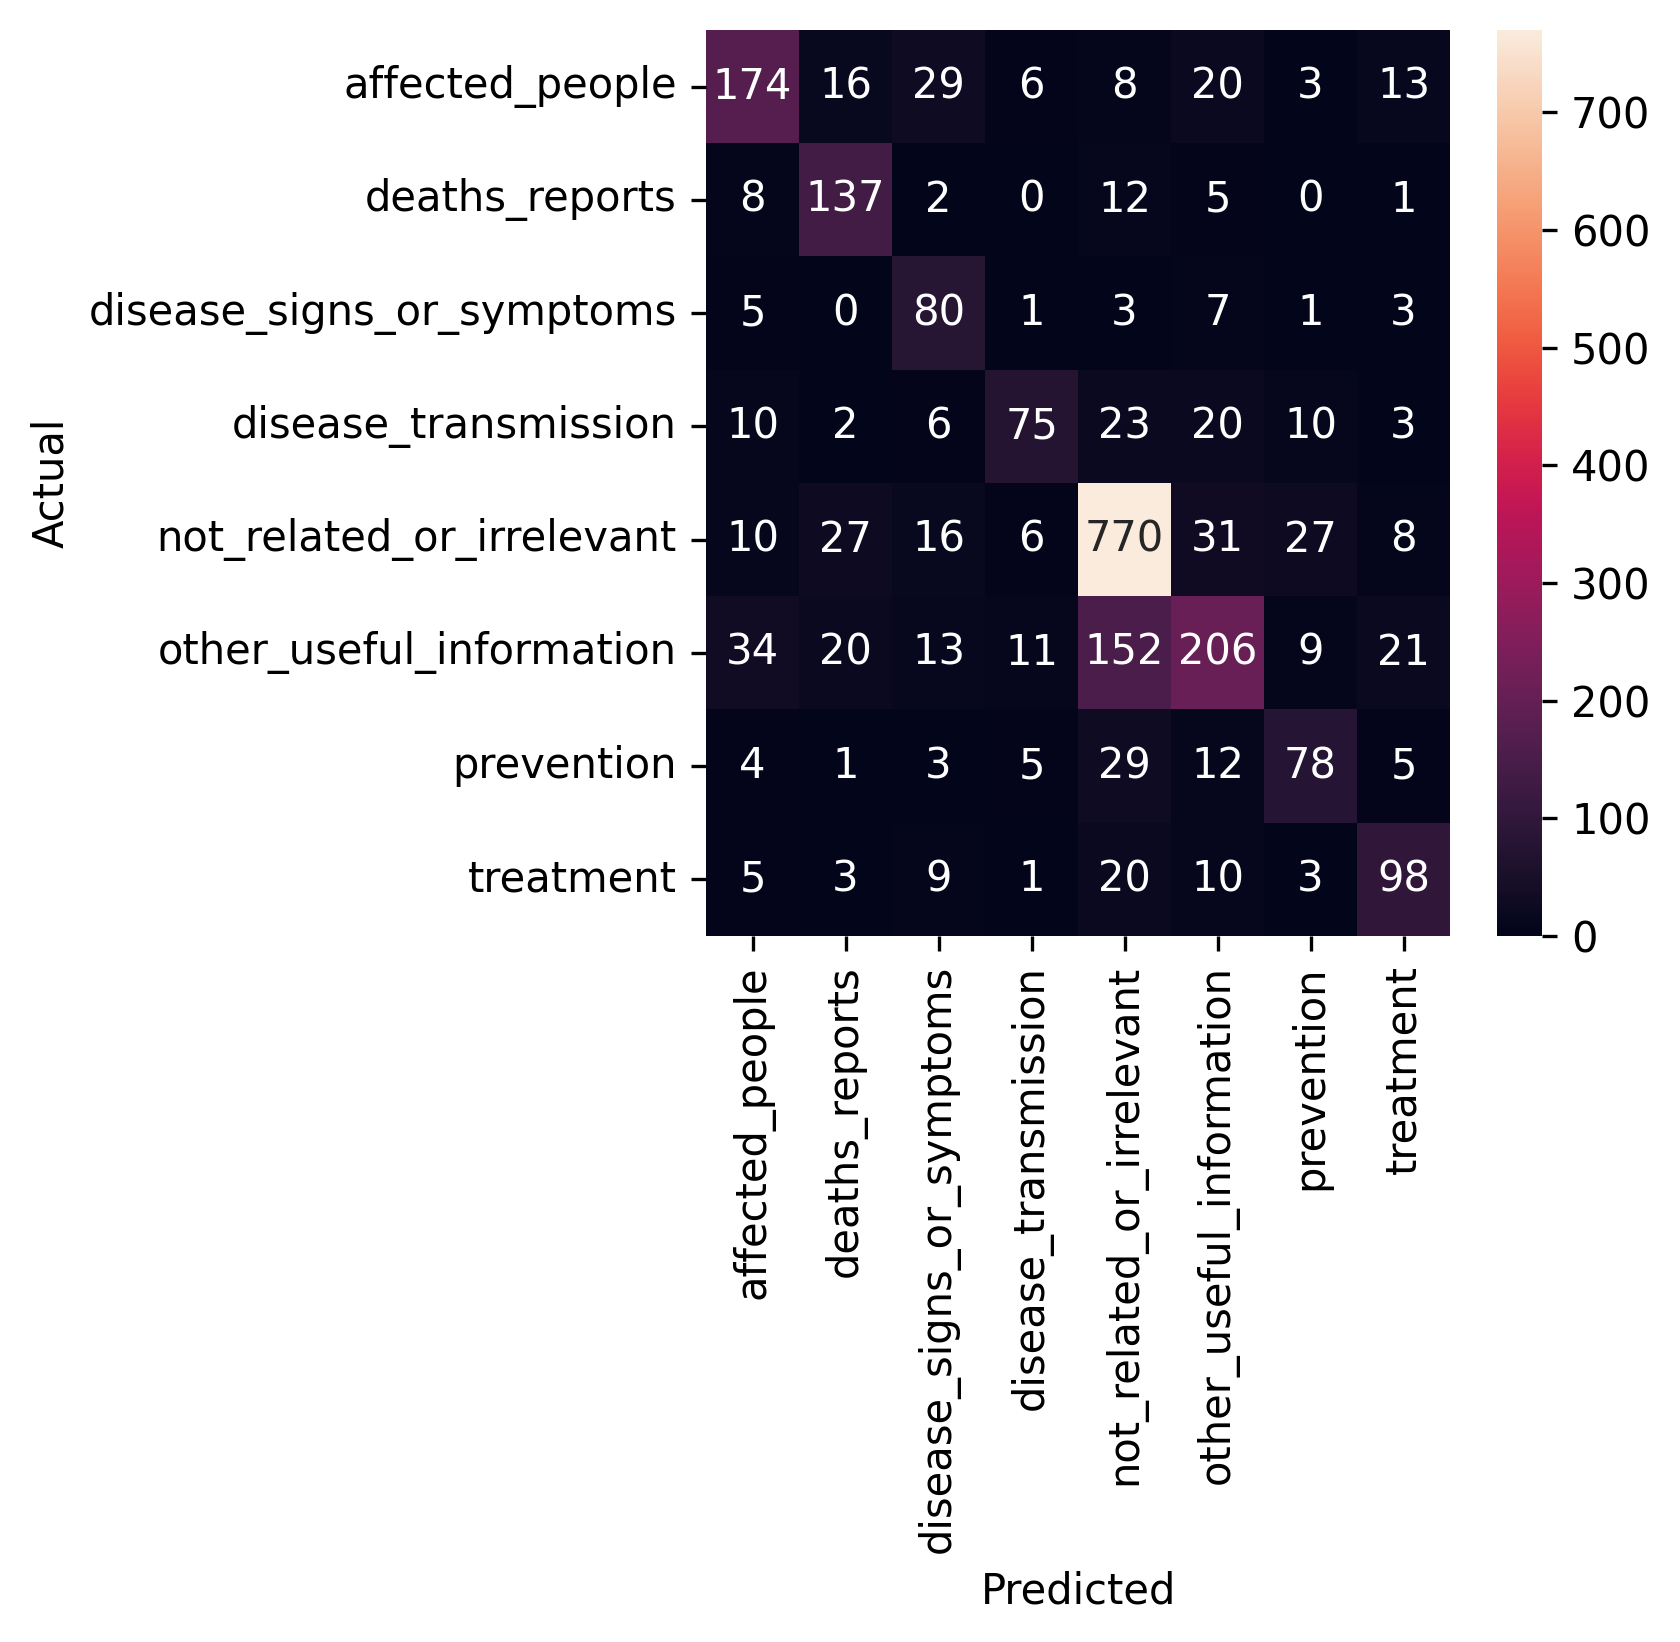

confmat_Support_Vector.png


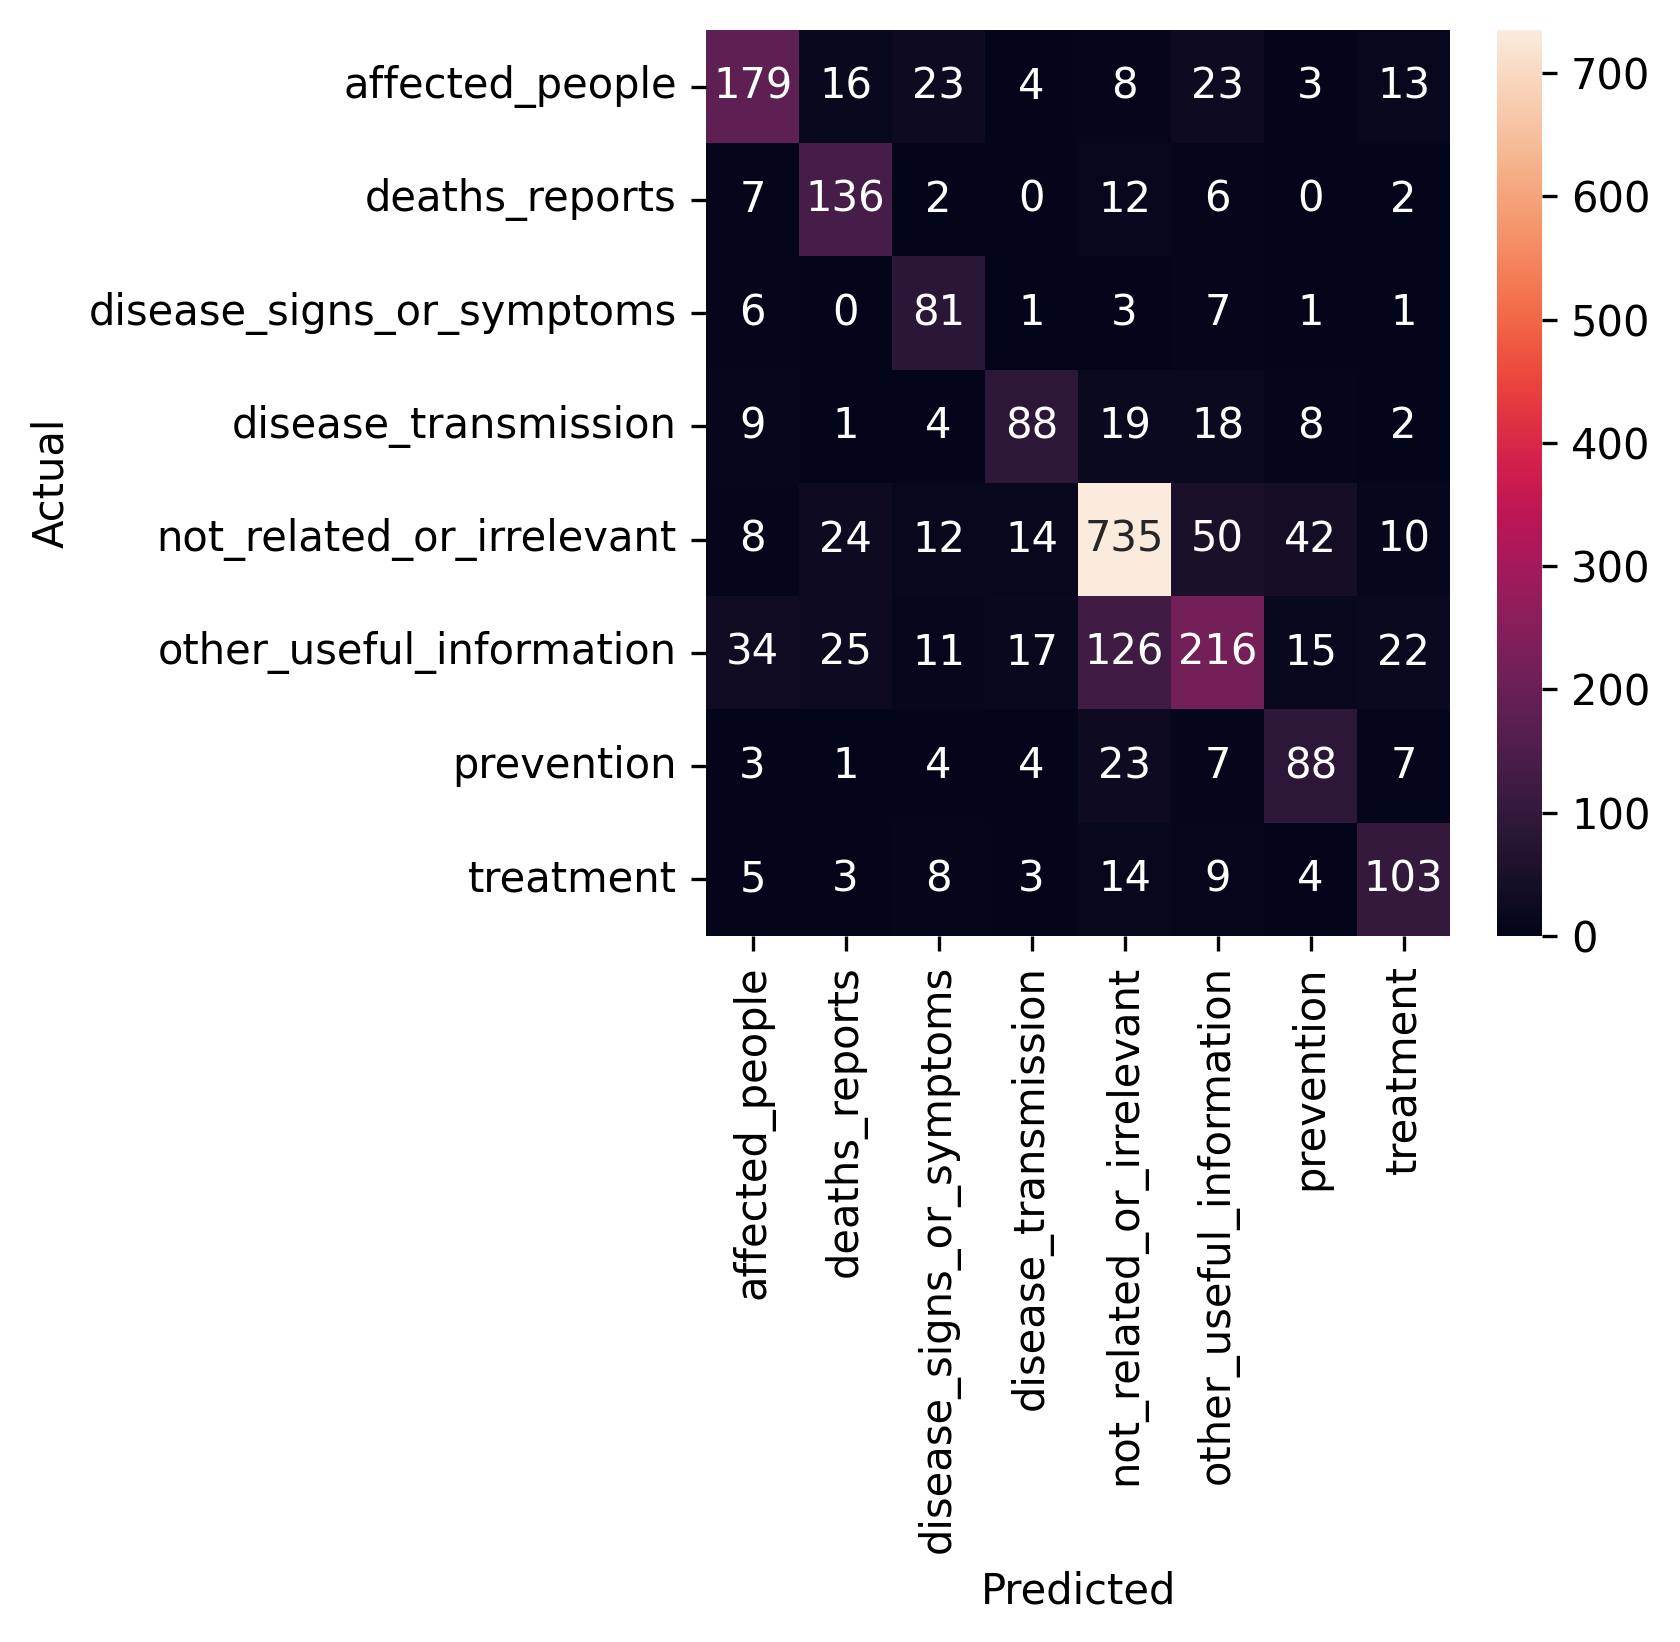

confmat_BERT.png


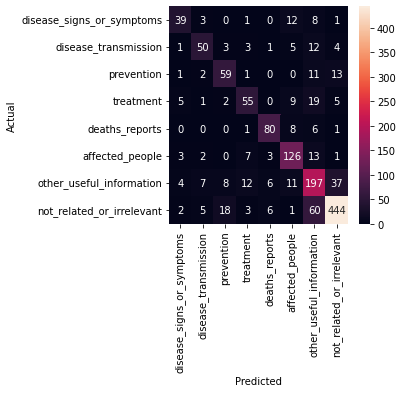

In [5]:
for path in glob('./plot/confmat_*'):
    print(path.split('/')[-1])
    display(Image(path,width=600, height=600))

In [20]:
from helper.metrics import analyse_epoch
from ds_toolkit.file_io.json_utils import read_json

In [22]:
epoch_data=read_json('./plot/epoch_data.json')

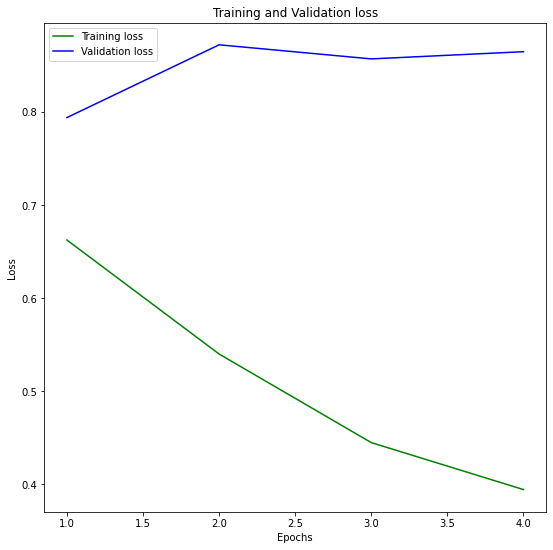

In [23]:
analyse_epoch(epoch_data)